In [74]:
from ai_models_fourcastnetv2 import model as sfno
import h5py
import os
import cfgrib
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import numpy as np
import xarray as xr

In [76]:
# Path to your GRIB file, typically a fourcastnetv2 prediction
grib_file = "default.grib"

# Load the GRIB file using xarray
ds = xr.open_dataset(grib_file, engine='cfgrib')

# Display the dataset structure
print(ds)

# Check the shape of a specific variable
for var in ds.data_vars:
    print(f"Shape of '{var}': {ds[var].shape}")



Ignoring index file 'default.grib.5b7b6.idx' incompatible with GRIB file
skipping variable: paramId==228246 shortName='u100'
Traceback (most recent call last):
  File "/home/jovyan/.local/lib/python3.10/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/jovyan/.local/lib/python3.10/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='heightAboveGround' value=Variable(dimensions=(), data=10.0) new_value=Variable(dimensions=(), data=100.0)
skipping variable: paramId==228247 shortName='v100'
Traceback (most recent call last):
  File "/home/jovyan/.local/lib/python3.10/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/home/jovyan/.local/lib/python3.10/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cf

<xarray.Dataset> Size: 12GB
Dimensions:            (step: 41, latitude: 721, longitude: 1440,
                        isobaricInhPa: 13)
Coordinates:
    time               datetime64[ns] 8B ...
  * step               (step) timedelta64[ns] 328B 0 days 00:00:00 ... 10 day...
    heightAboveGround  float64 8B ...
  * latitude           (latitude) float64 6kB 90.0 89.75 89.5 ... -89.75 -90.0
  * longitude          (longitude) float64 12kB 0.0 0.25 0.5 ... 359.5 359.8
    valid_time         (step) datetime64[ns] 328B ...
    surface            float64 8B ...
    meanSea            float64 8B ...
    entireAtmosphere   float64 8B ...
  * isobaricInhPa      (isobaricInhPa) float64 104B 1e+03 925.0 ... 100.0 50.0
Data variables:
    u10                (step, latitude, longitude) float32 170MB ...
    v10                (step, latitude, longitude) float32 170MB ...
    sp                 (step, latitude, longitude) float32 170MB ...
    msl                (step, latitude, longitude) float32 1

In [77]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

variable_info = {
    'u10': {'name': '10m Wind Speed', 'unit': 'm/s'},
    'v10': {'name': '10m Wind Speed', 'unit': 'm/s'},
    'msl': {'name': 'Mean Sea Level Pressure', 'unit': 'hPa'},
    'sp': {'name': 'Surface Pressure', 'unit': 'hPa'},
    't': {'name': 'Temperature', 'unit': 'K'}  # Adjust unit if needed (e.g., °C)
}

def robinson_predictions_plot(predictions, variable, t, huh=False):
    dat = predictions[variable].values[t]
    if huh:
        dat = predictions[variable].values[t][0]
    print(dat.shape)

    if variable == 'sp' or variable == 'msl':
        dat = predictions[variable].values[t]/100
    
    # Create subplots with the Robinson projection centered on the Pacific (central_longitude=180)
    central_longitude = 180
    projection = ccrs.Robinson(central_longitude=central_longitude)
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), subplot_kw={'projection': projection})
    
    # Define the extent of the map (in degrees)
    extent = (-180, 180, -90, 90)
    
    # Define the color limits
    vmin, vmax = -2, 1
    
    
    # Plot the prediction data
    ax.set_global()
    im1 = ax.imshow(np.roll(dat, shift=dat.shape[-1]//2, axis=-1), 
                       transform=ccrs.PlateCarree(central_longitude=0), 
                       cmap="jet", extent=extent, origin='upper')#, vmin=vmin, vmax=vmax)
    ax.coastlines()
    ax.set_title(f"FourCastNetv2 {t * 6} Hour Prediction of {variable} from Z:00:00 25 December 2024", fontsize=16)
    
    var_name = variable_info.get(variable, {}).get('name', variable)
    var_unit = variable_info.get(variable, {}).get('unit', '')

    # Add colorbar with dynamic label
    cbar = fig.colorbar(im1, ax=ax, orientation='horizontal', fraction=0.046, pad=0.08)
    cbar.set_label(f"{var_name} ({var_unit})", fontsize=12)
    
    for i in np.arange(2):
        gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
        gl.top_labels = False
        gl.right_labels = False

    plt.savefig(f'FourCastNetv2_prediction_{variable}_Dec_25_2024_{t * 6}_hours_from_initialization.png')
    fig.tight_layout()
    plt.show()

(721, 1440)


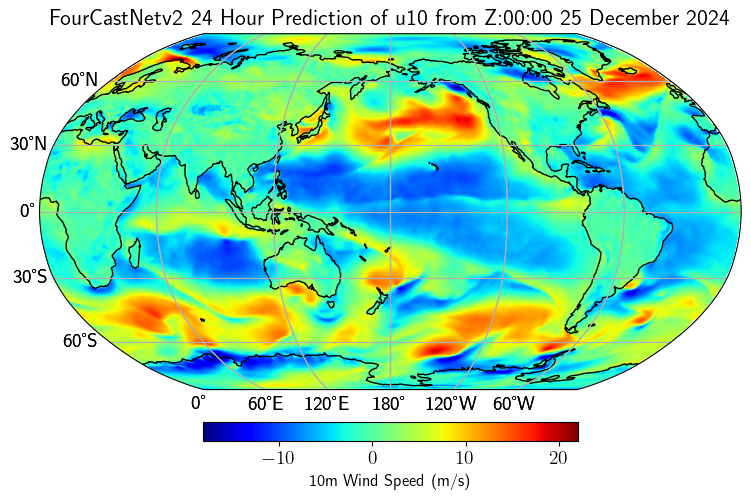

(721, 1440)


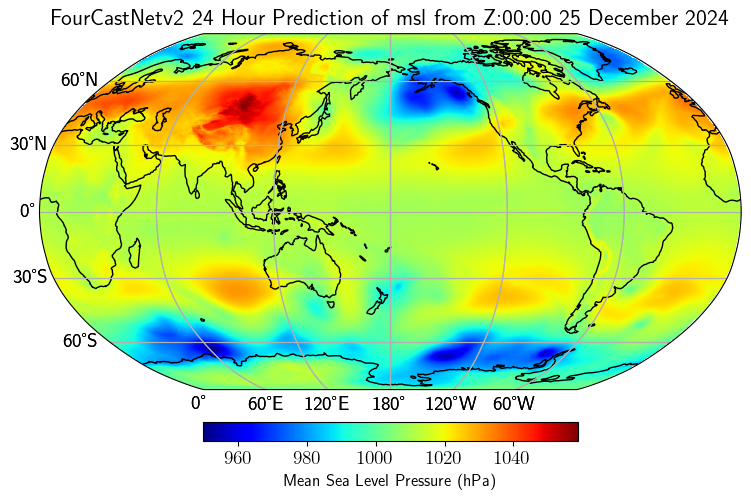

(721, 1440)


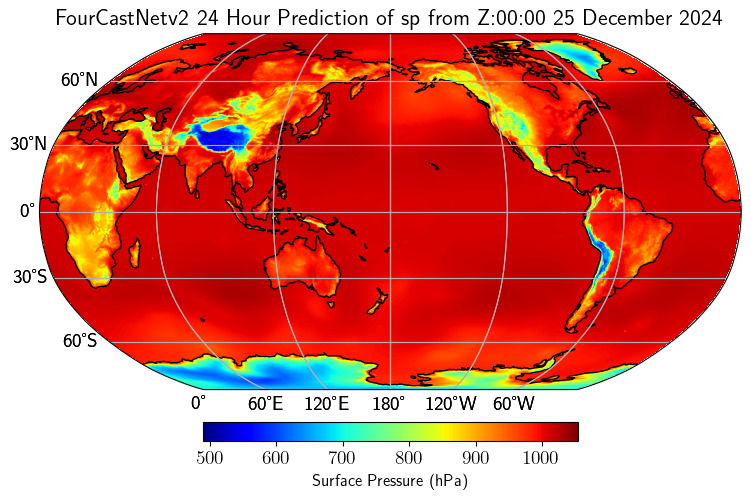

(721, 1440)


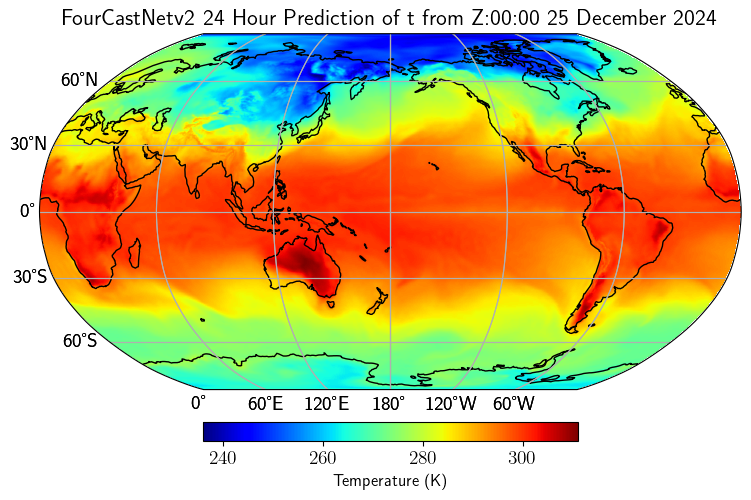

In [78]:
robinson_predictions_plot(ds, 'u10', 4)
robinson_predictions_plot(ds, 'msl', 4)
robinson_predictions_plot(ds, 'sp', 4)
robinson_predictions_plot(ds, 't', 4, True)

(721, 1440)


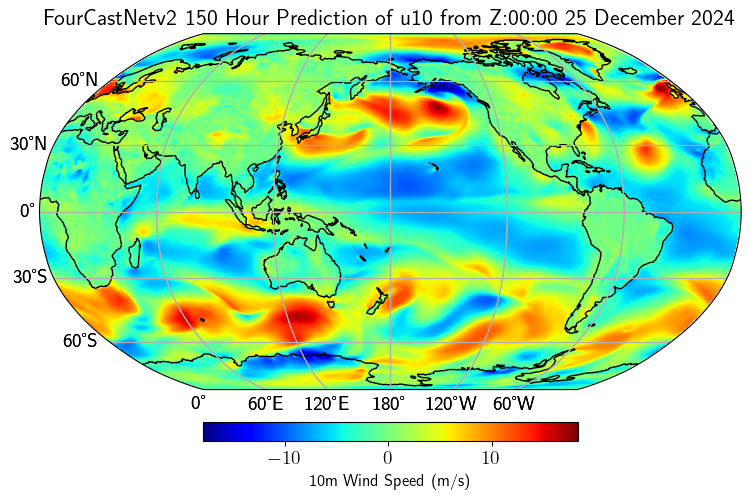

(721, 1440)


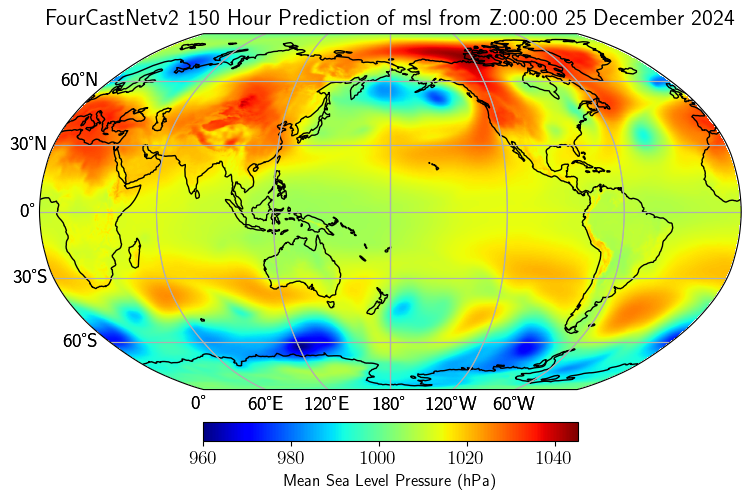

(721, 1440)


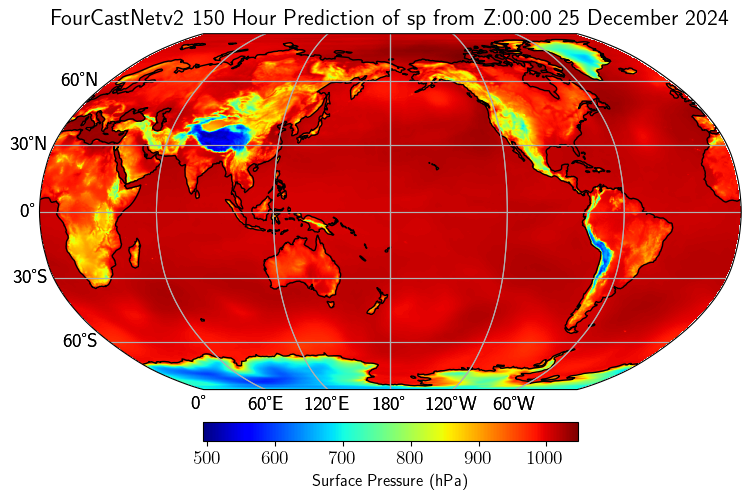

(721, 1440)


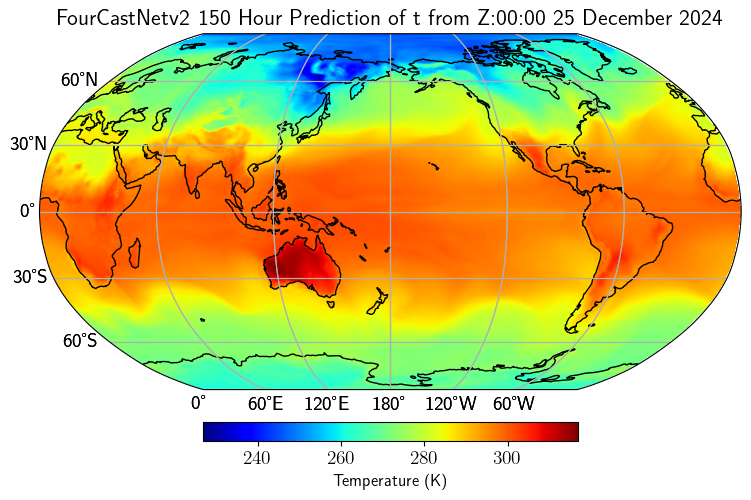

In [79]:
robinson_predictions_plot(ds, 'u10', 25)
robinson_predictions_plot(ds, 'msl', 25)
robinson_predictions_plot(ds, 'sp', 25)
robinson_predictions_plot(ds, 't', 25, True)